In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
mushroom_data = pd.read_csv("mushroom.csv")
mushroom_data
mushroom_data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
#EDA

In [6]:
mushroom_data_cleaned=mushroom_data.drop(columns=['Unnamed: 0'])


In [7]:
mushroom_data_cleaned.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [8]:
# Histograms for numerical features

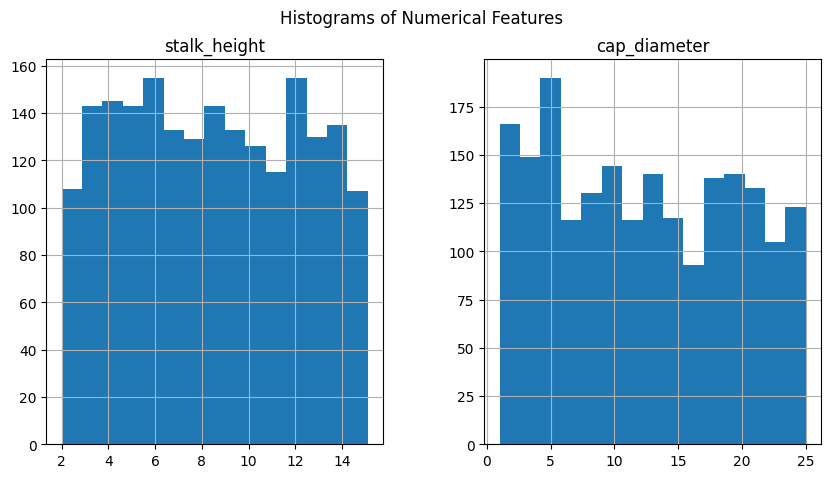

In [9]:
numerical_columns = ['stalk_height', 'cap_diameter']
mushroom_data_cleaned[numerical_columns].hist(bins=15, figsize=(10, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [10]:
# Box plots for numerical features

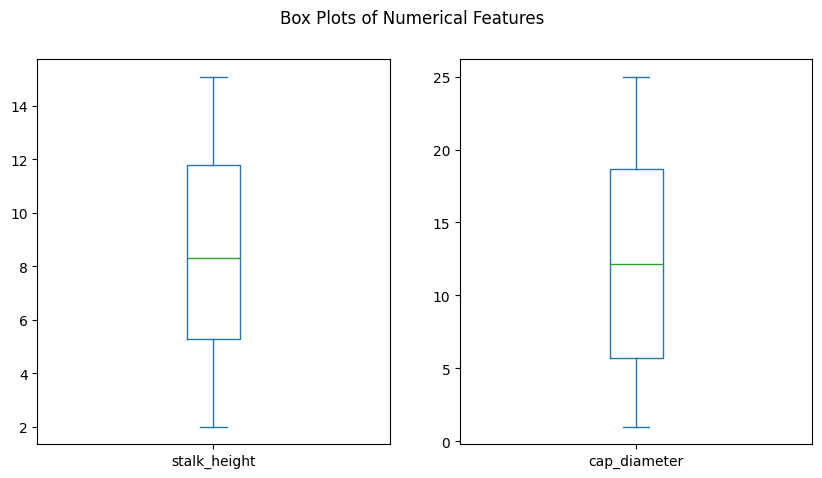

In [11]:
mushroom_data_cleaned[numerical_columns].plot(kind='box', subplots=True, layout=(1, 2), figsize=(10, 5))
plt.suptitle('Box Plots of Numerical Features')
plt.show()

In [12]:
# Correlation matrix

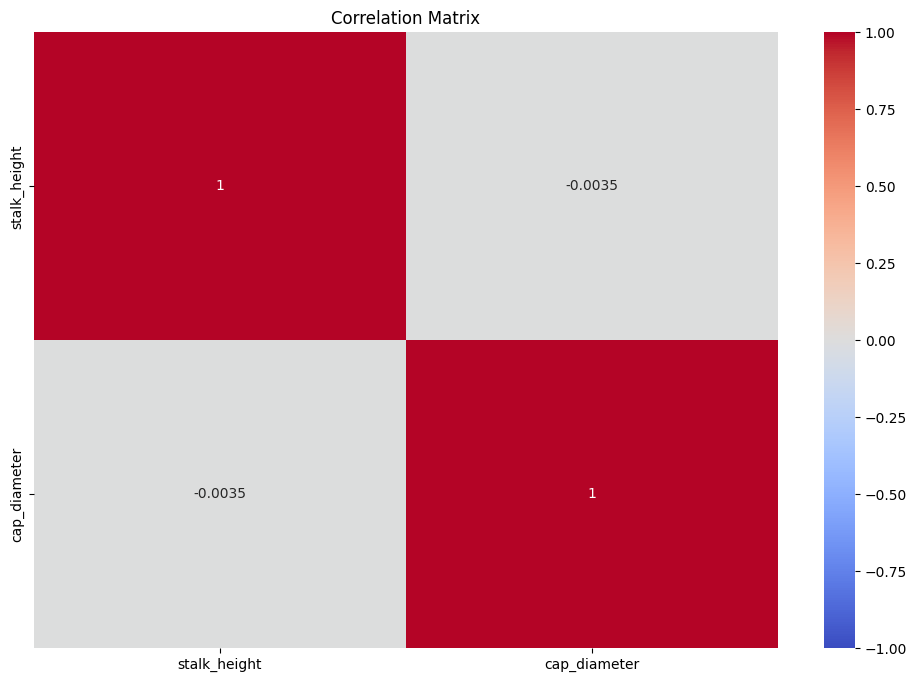

In [13]:
correlation_matrix = mushroom_data_cleaned[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [14]:
## Encode categorical variables

In [15]:
label_encoders = {}
for column in mushroom_data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    mushroom_data_cleaned[column] = le.fit_transform(mushroom_data_cleaned[column])
    label_encoders[column] = le

In [16]:
## training and spliting of data

In [17]:
X = mushroom_data_cleaned.drop('class', axis=1)
y = mushroom_data_cleaned['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Task 3: Data Visualization

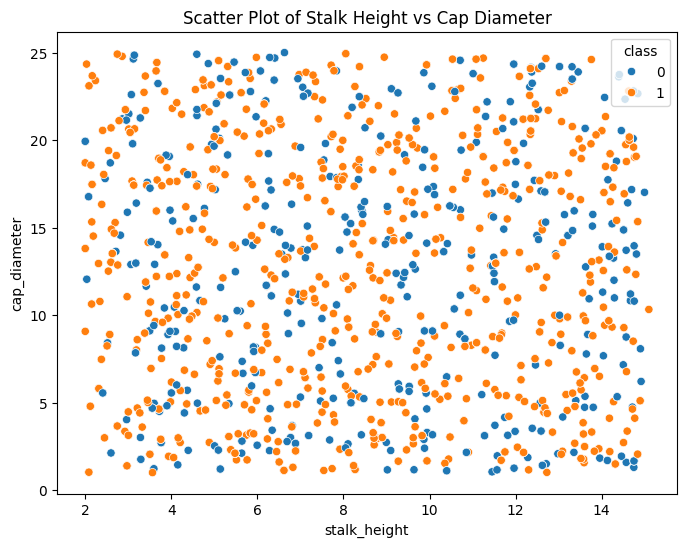

In [19]:
# Scatter plot to visualize relationship between stalk height and cap diameter
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stalk_height', y='cap_diameter', hue=y, data=mushroom_data_cleaned)
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.show()

In [20]:
# Task 4: SVM Implementation

In [21]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [22]:
# Evaluate model performance on the testing data

In [23]:
y_pred = svm_classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600

Confusion Matrix:
 [[  0 185]
 [  0 415]]
Accuracy Score: 0.6916666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Task 5: Visualization of SVM Results

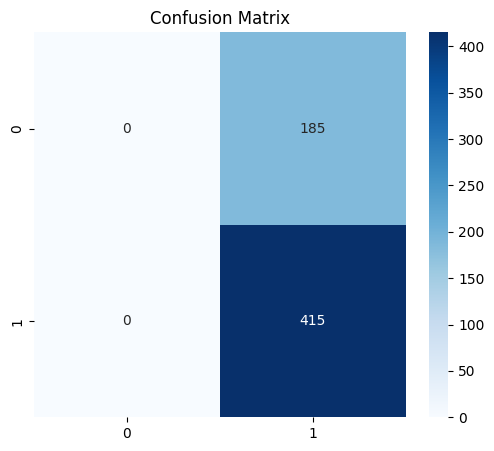

In [25]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Task 6: Parameter Tuning and Optimization

In [27]:
# Grid search for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [28]:
## Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))
print("Tuned Accuracy Score:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 100, 'kernel': 'rbf'}
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       185
           1       0.88      0.92      0.90       415

    accuracy                           0.86       600
   macro avg       0.84      0.82      0.83       600
weighted avg       0.86      0.86      0.86       600

Tuned Accuracy Score: 0.8583333333333333


In [28]:
##Comparison and Analysis

In [29]:
results = {}
for kernel in ['linear', 'poly', 'rbf']:
    svm_classifier = SVC(kernel=kernel, random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred_kernel = svm_classifier.predict(X_test)
    results[kernel] = accuracy_score(y_test, y_pred_kernel)

print("Accuracy comparison across kernels:", results)

Accuracy comparison across kernels: {'linear': 0.6916666666666667, 'poly': 0.7183333333333334, 'rbf': 0.6916666666666667}
